In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
auto = pd.read_csv('/Users/mma0812/Downloads/CarPrice_Assignment.csv')
auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [43]:
auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df = auto.copy()

In [5]:
X = df.drop('price', axis=1)
y = df['price']
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,six,209,mpfi,3.62,3.39,8.00,182,5400,16,22
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22
100,101,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,...,four,120,2bbl,3.33,3.47,8.50,97,5200,27,34
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,five,183,idi,3.58,3.64,21.50,123,4350,22,25


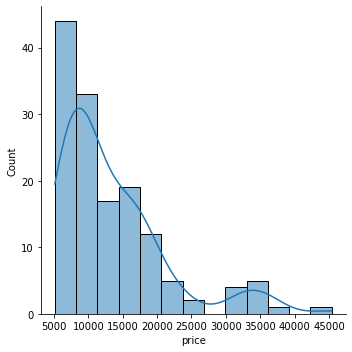

In [67]:
sns.displot(y_train, kde=True);

In [71]:
X_test.enginetype.value_counts()

ohc      45
ohcf      7
ohcv      4
l         3
rotor     2
dohc      1
Name: enginetype, dtype: int64

In [37]:
categorical_col = df.select_dtypes(include=object).columns[1:]
numerical_col = df.select_dtypes(exclude=object).columns[:-1]
#doornumber, cylindernumber, 
categorical_col, numerical_col

(Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
        'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
       dtype='object'),
 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
        'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
       dtype='object'))

In [38]:
 df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [39]:
transformer = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_col),
                                             ('cat', OneHotEncoder(), categorical_col)])
transformer

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])

In [65]:
pipe = Pipeline([('transform1', transformer),
                ('model', Ridge())])
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9530597412629533

In [66]:
y_pred_train = pipe.predict(X_train)

train_mse = mean_squared_error(y_train, pipe.predict(X_train))
print('Train MSE: ', train_mse)


Train MSE:  2860990.799863476


In [56]:
#y_pred_test = pipe.predict(X_test)
#test_mse = mean_squared_error(y_test, pipe.predict(X_test))
#print('Test MSE: ', test_mse)

Train MSE:  2860990.799863476


In [62]:
y_pred_test = pipe.transform(X_test)

AttributeError: 'LinearRegression' object has no attribute 'transform'

In [68]:
# Due to above error lets try to transform test data separately 

X_test_transform = transformer.transform(X_test)
X_test_transform

ValueError: Found unknown categories ['three'] in column 7 during transform

In [69]:
transformer.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])>